In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


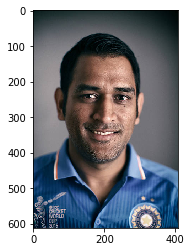

In [3]:
image = cv2.imread("DataSets/Dhoni Image/Dhoni of India poses during the India 2015 I (3).jpg")
image_Rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_Rgb)
# cv2.waitKey(0)

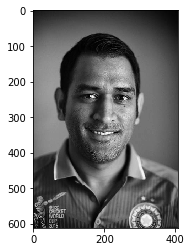

In [4]:
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray,cmap = 'gray')

In [5]:
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")
image_gray

array([[21, 21, 21, ...,  4,  4,  4],
       [21, 21, 21, ...,  4,  4,  4],
       [21, 21, 22, ...,  4,  4,  4],
       ...,
       [ 9, 11, 11, ..., 40, 39, 37],
       [ 9, 11, 11, ..., 31, 29, 27],
       [ 9, 11, 11, ..., 25, 21, 18]], dtype=uint8)

In [6]:
faces = face_cascade.detectMultiScale(image_gray)
faces

array([[ 67, 138, 264, 264],
       [264, 500, 101, 101]], dtype=int32)

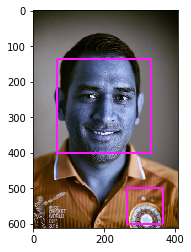

In [7]:
cv2.destroyAllWindows()
for x,y,w,h in faces:
    face_image = cv2.rectangle(image,(x,y),(x+w,y+h),(255,25,255),3)
    roi_gray = face_image[x:x+w,y:y+h]
    eyes_image = eye_cascade.detectMultiScale(roi_gray)
    for ex,ey,ew,eh in eyes_image:
        eye_image = cv2.rectangle(roi_gray,(ex,ey),(ex+ew,ey+eh),(255,255,255),1)

plt.imshow(face_image)


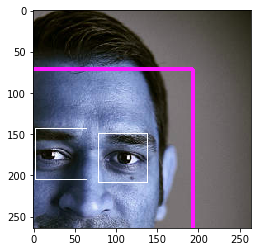

In [8]:
plt.imshow(eye_image)

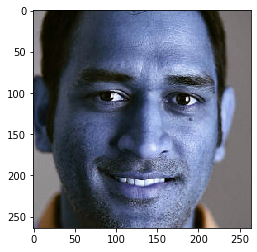

In [9]:
def get_cropped_image_if_2_eyes(image_path):
    image = cv2.imread(image_path)
#     image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")
    faces = face_cascade.detectMultiScale(image)
#     print("faces is: ",faces)
    for x,y,w,h in faces:
#         face_image = cv2.rectangle(image,(x,y),(x+w,y+h),(255,255,255),3)
#         roi_gray = image[x:x+w,y:y+h]
        roi_color = image[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_color)
#         print("eyes is : ",eyes)
        if len(eyes)>=0:
            return roi_color
#     return result
#         for ex,ey,ew,eh in eyes:
#             cv2.cvtColor(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)

result = get_cropped_image_if_2_eyes("DataSets/Dhoni Image/Dhoni of India poses during the India 2015 I (3).jpg")
plt.imshow(result)    

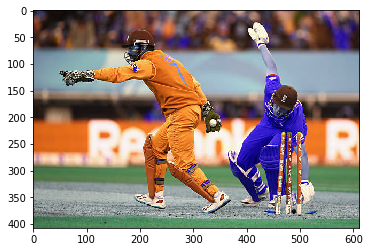

In [10]:
new_image = cv2.imread("DataSets/Dhoni Image/Dhoni of India appeals as he stumps Jonathan_yythkg.jpg",cv2.COLOR_BGR2RGB)
plt.imshow(new_image)

[[[114 111 103]
  [115 112 104]
  [115 112 104]
  ...
  [ 61  67  66]
  [ 64  70  69]
  [ 41  47  46]]

 [[114 111 103]
  [115 112 104]
  [115 112 104]
  ...
  [ 51  57  56]
  [ 62  68  67]
  [ 57  63  62]]

 [[114 111 103]
  [115 112 104]
  [115 112 104]
  ...
  [ 48  54  53]
  [ 58  64  63]
  [ 61  67  66]]

 ...

 [[ 30  28  27]
  [ 29  27  26]
  [ 27  25  24]
  ...
  [ 28   6   0]
  [ 34  11   3]
  [ 59  36  28]]

 [[ 31  29  28]
  [ 30  28  27]
  [ 28  26  25]
  ...
  [ 32  10   4]
  [ 40  17   9]
  [ 65  39  32]]

 [[ 30  28  27]
  [ 29  27  26]
  [ 27  25  24]
  ...
  [ 35  13   8]
  [ 45  21  15]
  [ 70  45  35]]]


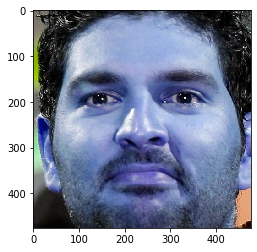

In [11]:
new_result = get_cropped_image_if_2_eyes("DataSets/Yuvraj Images/1763x2048 Yuvraj Singh.jpg")
print(new_result)
plt.imshow(new_result)

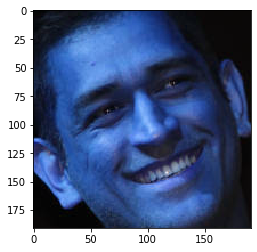

In [12]:
image = cv2.imread("DataSets/Dhoni Image/Indian cricketer Mahendra Singh Dhoni smiles during_yythkg.jpg",cv2.COLOR_BGR2GRAY)
# plt.imshow(image)
next_result = get_cropped_image_if_2_eyes("DataSets/Dhoni Image/Indian cricketer Mahendra Singh Dhoni smiles during_yythkg.jpg")
plt.imshow(next_result)

In [13]:
path_to_data = "./DataSets/"
path_to_cropped_data = "./DataSets/cropped/"
import os
img_dir = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dir.append(entry.path)
img_dir


['./DataSets/Dhoni Image',
 './DataSets/Raina Images',
 './DataSets/Sachin Images',
 './DataSets/Virat Images',
 './DataSets/Yuvraj Images']

In [14]:
import shutil
if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [15]:
from collections import defaultdict
cropped_image_dirs =[]
celebrity_file_name_dict = {'Dhoni Image':[],'Yuvraj Images':[],'Raina Images':[],'Sachin Images':[],"Virat Images":[]}
for img_d in img_dir:
    count = 1
    celebrity_name = img_d.split('/')[-1]
    print(celebrity_name)
    
    for entry in os.scandir(img_d):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating Cropped Images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/"+cropped_file_name
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_name_dict[celebrity_name].append(cropped_file_path)
            count+=1

Dhoni Image
Generating Cropped Images in folder:  ./DataSets/cropped/Dhoni Image
Raina Images
Generating Cropped Images in folder:  ./DataSets/cropped/Raina Images
Sachin Images
Generating Cropped Images in folder:  ./DataSets/cropped/Sachin Images
Virat Images
Generating Cropped Images in folder:  ./DataSets/cropped/Virat Images
Yuvraj Images
Generating Cropped Images in folder:  ./DataSets/cropped/Yuvraj Images


In [19]:
celebrity_file_name_dict['Raina Images']

['./DataSets/cropped/Raina Images/Raina Images1.png',
 './DataSets/cropped/Raina Images/Raina Images2.png',
 './DataSets/cropped/Raina Images/Raina Images3.png',
 './DataSets/cropped/Raina Images/Raina Images4.png',
 './DataSets/cropped/Raina Images/Raina Images5.png',
 './DataSets/cropped/Raina Images/Raina Images6.png',
 './DataSets/cropped/Raina Images/Raina Images7.png',
 './DataSets/cropped/Raina Images/Raina Images8.png',
 './DataSets/cropped/Raina Images/Raina Images9.png',
 './DataSets/cropped/Raina Images/Raina Images10.png',
 './DataSets/cropped/Raina Images/Raina Images11.png',
 './DataSets/cropped/Raina Images/Raina Images12.png',
 './DataSets/cropped/Raina Images/Raina Images13.png',
 './DataSets/cropped/Raina Images/Raina Images14.png',
 './DataSets/cropped/Raina Images/Raina Images15.png',
 './DataSets/cropped/Raina Images/Raina Images16.png',
 './DataSets/cropped/Raina Images/Raina Images17.png',
 './DataSets/cropped/Raina Images/Raina Images18.png',
 './DataSets/croppe

In [20]:
import numpy as np
import pywt

def w2d(img,mode = "haar",level = 1):
    imArray = img
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArraya = np.float32(imArray)
    # imArray=imArray/255
    # compute coefficients
    coeffs = pywt.wavedec2(imArray,mode,level = level)
    
    # Process Coefficieints
    coeffs_H = list(coeffs)
    coeffs_H[0]*=0
    
    # Reconstruction
    imArray_H = pywt.waverec2(coeffs_H,mode)
    imArray_H*=255
    imArray_H = np.uint8(imArray_H)
    return imArray_H
    


: 

In [27]:
x,y = [],[]
class_dict = {}
count = 0
for celebrity_name in celebrity_file_name_dict.keys():
    class_dict[celebrity_name] = count
    count+=1
    
for celebrity_name,training_files in celebrity_file_name_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img,(32,32))
        # img_har = w2d(img,'db1',5)
        # scaled_img_har = cv2.resize(img_har,(32,32))
        # combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        x.append(scaled_raw_img.reshape(32*32*3,1))
        y.append(class_dict[celebrity_name])

In [28]:
len(x)

457

In [29]:
len(x[0])

3072

In [30]:
x = np.array(x).reshape(len(x),len(x[0])).astype(float)
x.shape

(457, 3072)

In [31]:
x[0]

array([59., 65., 70., ..., 46., 50., 56.])

In [32]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.metrics import classification_report

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size = 0.25)
pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel = 'rbf',C = 10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.8347826086956521

In [35]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.65      0.76        20
           1       0.81      0.91      0.85        32
           2       0.67      0.60      0.63        10
           3       0.79      0.79      0.79        19
           4       0.89      0.97      0.93        34

    accuracy                           0.83       115
   macro avg       0.82      0.78      0.79       115
weighted avg       0.84      0.83      0.83       115



In [36]:
model_params = {
    'svm':{
        'model':SVC(gamma = "auto",probability = True),
        'params':{
            'svc__C':[1,3,5,7,10,15,20,100,500,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,8,10,15,20]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver = 'liblinear',multi_class = 'auto'),
        'params':{
            'logisticregression__C':[1,3,5,8,10,15,20]
        }
    }
}

In [37]:
scores = []
best_estimators = {}
import pandas as pd
for algo,np in model_params.items():
    pipe = make_pipeline(StandardScaler(),np['model'])
    clf = GridSearchCV(pipe,np['params'],cv = 4, return_train_score = False)
    clf.fit(x_train,y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
df = pd.DataFrame(scores,columns = ['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.731088,"{'svc__C': 3, 'svc__kernel': 'rbf'}"
1,random_forest,0.628659,{'randomforestclassifier__n_estimators': 20}
2,logistic_regression,0.701813,{'logisticregression__C': 1}


In [38]:
best_estimators['svm']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=3, gamma='auto', probability=True))])

In [39]:
best_estimators['svm'].score(x_test,y_test)

0.8347826086956521

In [40]:
best_estimators['random_forest']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=20))])

In [41]:
best_estimators['random_forest'].score(x_test,y_test)

0.7391304347826086

In [31]:
model = Pipeline(steps = [('standardscaler',StandardScaler()),('randomforestclassifier',RandomForestClassifier(n_estimators = 5))])
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.5978260869565217

In [42]:
best_estimators['logistic_regression']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1, solver='liblinear'))])

In [43]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.8956521739130435

In [44]:
best_clf = best_estimators['logistic_regression']
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,best_clf.predict(x_test))
print(cm)
best_clfsv = best_estimators['svm']
from sklearn.metrics import confusion_matrix
cms = confusion_matrix(y_test,best_clfsv.predict(x_test))
print(cms)

[[15  1  1  2  1]
 [ 0 29  0  2  1]
 [ 3  0  6  1  0]
 [ 0  0  0 19  0]
 [ 0  0  0  0 34]]
[[13  2  1  2  2]
 [ 0 29  1  1  1]
 [ 0  3  6  1  0]
 [ 1  2  1 15  0]
 [ 0  1  0  0 33]]


c:\Users\Bansidharan\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(69.0, 0.5, 'Truth')

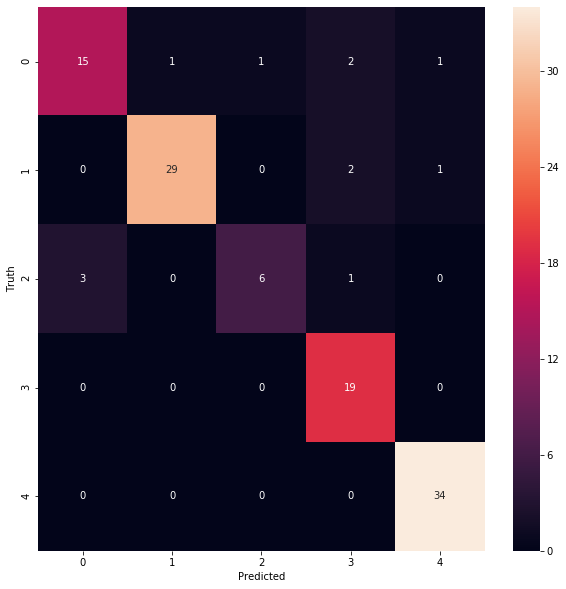

In [45]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(cm,annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

ValueError: X has 3072 features, but this StandardScaler is expecting 4096 features as input.

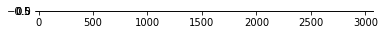

In [74]:
test_image =cv2.imread("DataSets/cropped/Raina Images/Raina Images23.png")
test_image = cv2.resize(test_image,(32,32))
test_image = test_image.reshape(1,32*32*3)
plt.imshow(test_image)
best_clf.predict(test_image)

In [209]:
cv = cross_val_score(best_clf,x,y,cv = 7)
cv

array([0.60294118, 0.67647059, 0.64705882, 0.67647059, 0.64705882,
       0.71641791, 0.80597015])

In [47]:
# To save the trained model
# !pip install joblib
import joblib
joblib.dump(best_clf,'saved_model2.pkl')
joblib.dump(best_clfsv,'saved_model3.pkl')

['saved_model3.pkl']

In [48]:
import json
with open("class_dictionary.json",'w') as f:
    f.write(json.dumps(class_dict))